In [60]:
import numpy as np
from scipy.special import gamma, hyp2f1
import matplotlib.pyplot as plt

In [61]:
%matplotlib inline

In [62]:
plt.rcParams['figure.figsize'] = [15, 10]

In [63]:
def some_weird_distribution(a, b):
    eta = np.random.uniform(0, 1)
    xi = np.random.uniform(0, 1)
    
    return eta ** a + xi ** b

In [64]:
def some_weird_function(a, b, x):
    u = 1 / a
    v = 1 / b
    
    if x <= 1:
        return x ** (u + v - 1) * gamma(1 + u) * gamma(1 + v) / gamma(u + v)
    else:
        return v * x ** (v - 1) * (hyp2f1(u, 1 - v, u + 1, 1 / x) - (x - 1) ** u * hyp2f1(u, 1 - v, u + 1, 1 - (1 / x)))

In [65]:
def build_hist_with_function(a, b):
    x_values = np.linspace(0.0, 2.0, 200)
    y_values = np.vectorize(lambda x: some_weird_function(a, b, x))(x_values)
    plt.plot(x_values, y_values, color='red')

    samples = np.fromiter((some_weird_distribution(a, b) for _ in range(5000)), float)
    plt.hist(samples, bins=50, alpha=0.5, density=True)

    plt.show()

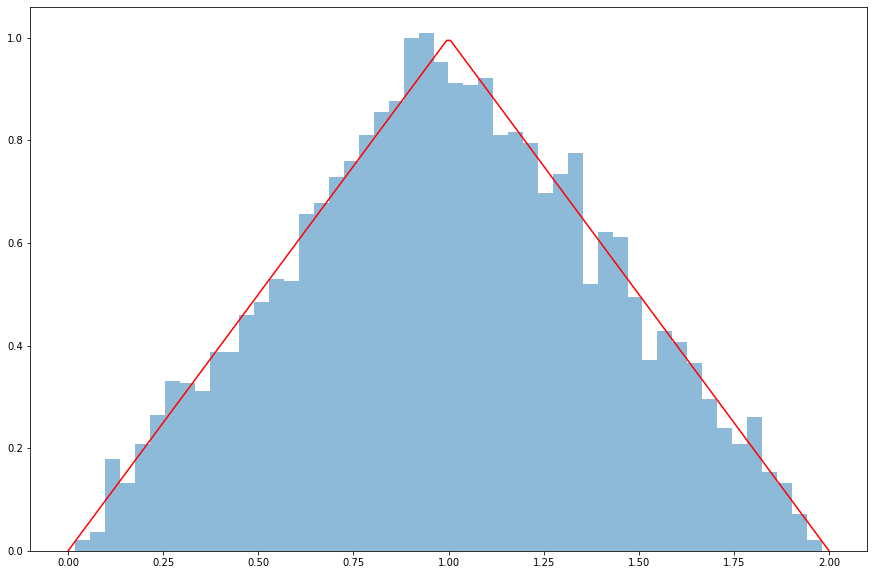

In [66]:
build_hist_with_function(a=1, b=1)

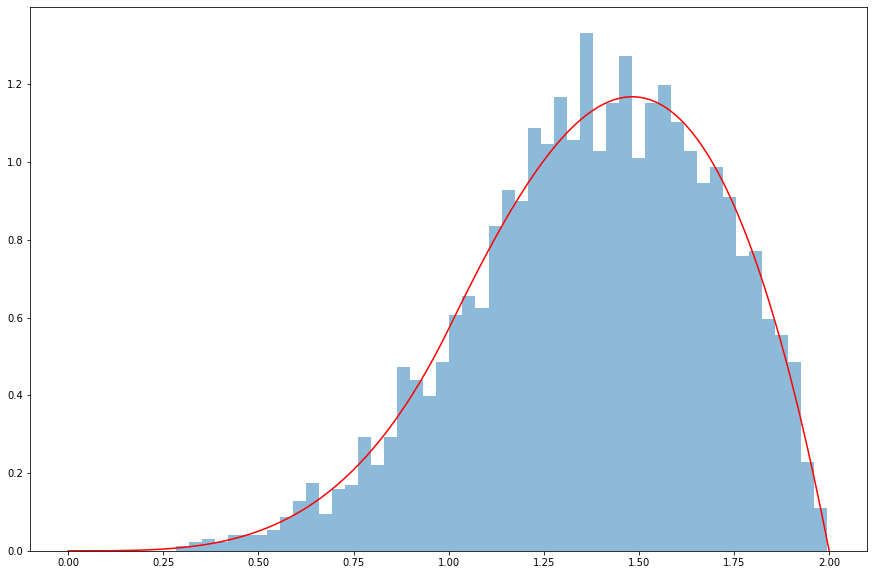

In [67]:
build_hist_with_function(a=0.5, b=0.4)

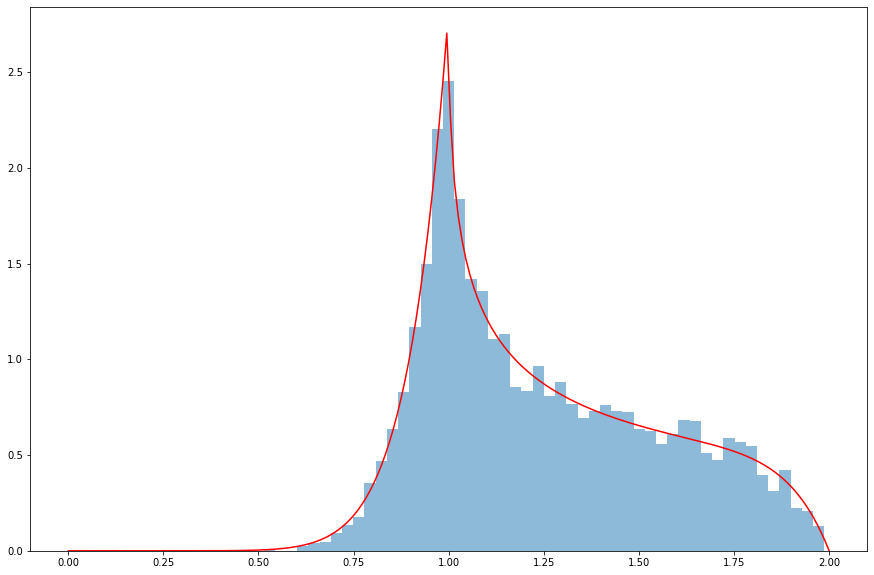

In [68]:
build_hist_with_function(a=2.0, b=0.1)